In [1]:
%pylab inline

import os
from styles import slides

Populating the interactive namespace from numpy and matplotlib


In [2]:
had_em_list = loadtxt("../inputs/real_deal/had_emission.txt", dtype=str)
sample_list = loadtxt("../inputs/real_deal/rd7_sample.txt", dtype=str)

had_em_in_sample = array([file in had_em_list for file in sample_list], dtype=bool)
sample_had_em_list = sample_list[had_em_in_sample]

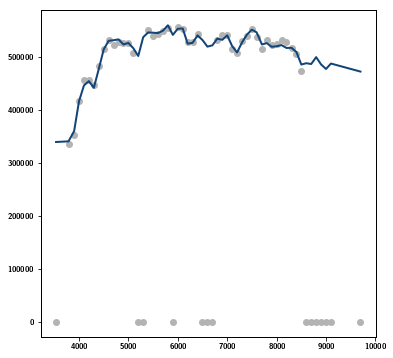

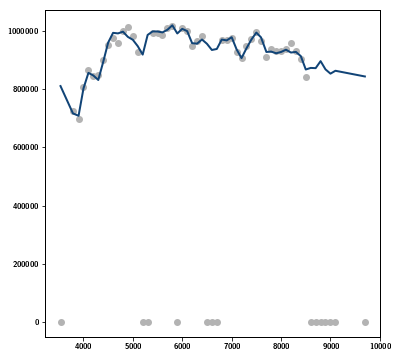

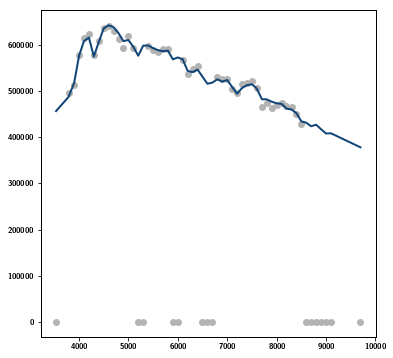

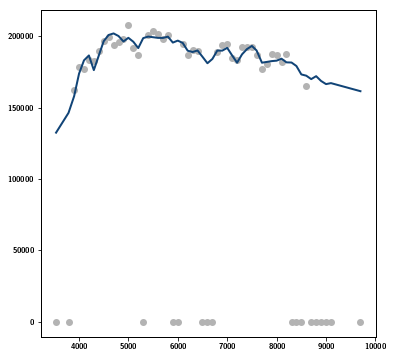

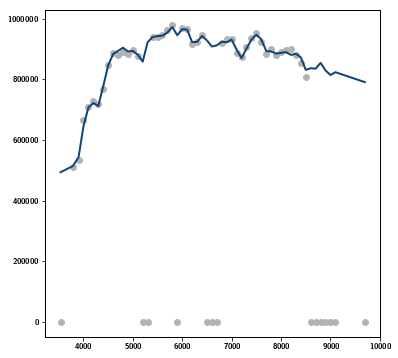

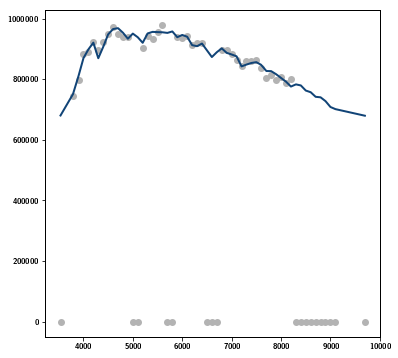

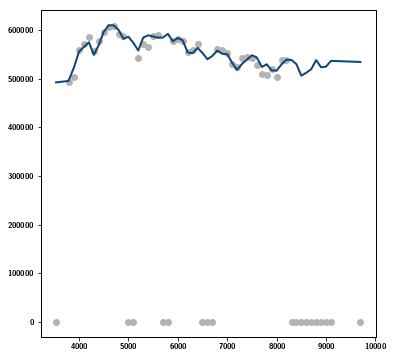

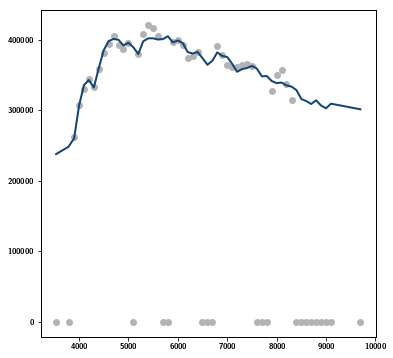

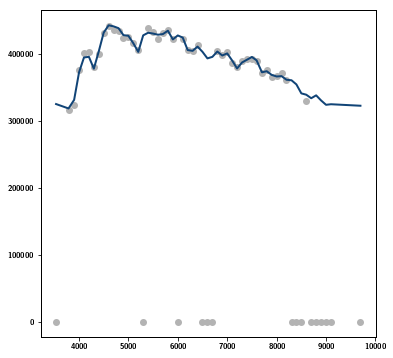

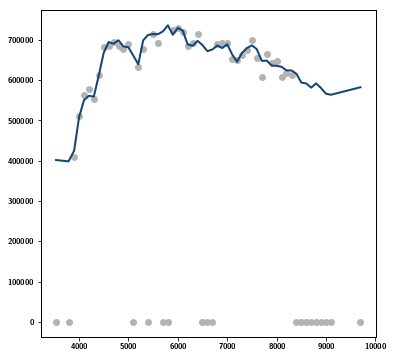

In [3]:
for file in sample_had_em_list[:10]:
    fitname = "../inputs/real_deal/outs/nem_jpas/dynbasfit_processed_nem_JPAS_"+file.replace("fit", "log")

    wl, fo, sg, fm = loadtxt(fitname, usecols=(0,1,2,5), unpack=True)
    emission = array([(fm[i]-fo[i])**2/sg[i]**2>100.0 if fo[i]>0.0 else False for i in xrange(wl.size)], dtype=bool)
    figure()
    plot(wl[emission], fo[emission], "o", color="0.2")
    plot(wl[~emission], fo[~emission], "o", color="0.7")
    plot(wl, fm, "-")

In [4]:
has_residual_emission_list = []
for file in sample_had_em_list:
    fitname = "../inputs/real_deal/outs/nem_jpas/dynbasfit_processed_nem_JPAS_"+file.replace("fit", "log")

    wl, fo, sg, fm = loadtxt(fitname, usecols=(0,1,2,5), unpack=True)
    emission = array([(fm[i]-fo[i])**2/sg[i]**2>100.0 if fo[i]>0.0 else False for i in xrange(wl.size)], dtype=bool)
    if any(emission): has_residual_emission_list.append(file)
        
has_residual_emission_list = array(has_residual_emission_list)

In [5]:
#savetxt("../inputs/real_deal/jpas_residual_emission.txt", has_residual_emission_list, fmt="%25s")